## 1 Principal Component Analysis

In [2]:
import pandas as pd

df = pd.read_csv('housing_data.csv')
all_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
X = df[all_features]
y = df["medv"]

### 1.1 Scatterplot

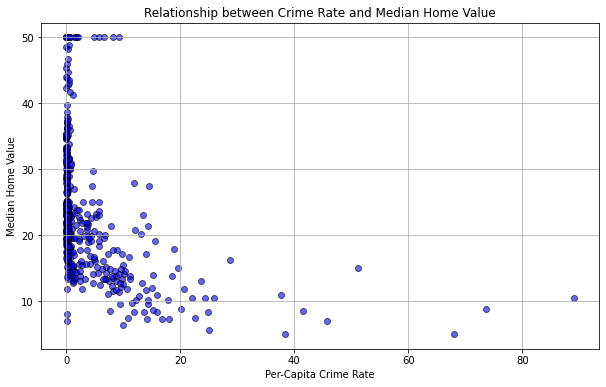

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(X['crim'], y, alpha=0.6, color='b', edgecolors='k')
plt.title('Relationship between Crime Rate and Median Home Value')
plt.xlabel('Per-Capita Crime Rate')
plt.ylabel('Median Home Value')
plt.grid(True)

In [4]:
Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.34, random_state=371)
lr = LinearRegression()
lr.fit(Xt[['crim']], yt)

yt_hat = lr.predict(Xt[['crim']])
yv_hat = lr.predict(Xv[['crim']])

# calculate RMSE for training set
rmse_t = np.sqrt(mean_squared_error(yt, yt_hat))

# calculate RMSE for test set
rmse_v = np.sqrt(mean_squared_error(yv, yv_hat))

print("RMSE on training set:", rmse_t)
print("RMSE on test set:", rmse_v)

RMSE on training set: 8.379260361503452
RMSE on test set: 8.661064606201775


### 1.2 Features and plots

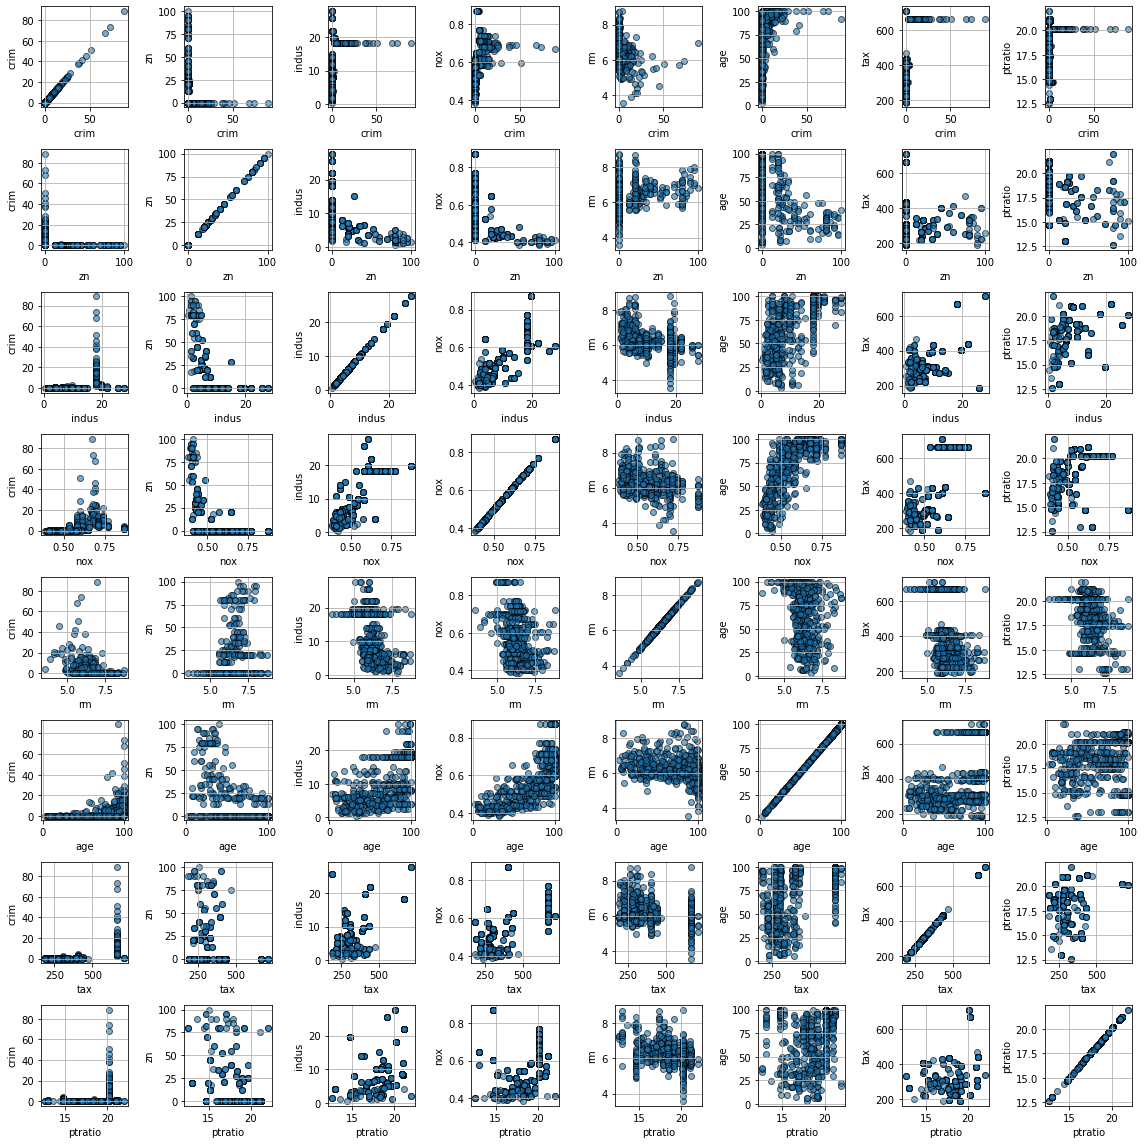

In [5]:
selected_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'tax', 'ptratio']

plt.figure(figsize=(16, 16))

for i in range(8):
    for j in range(8):
        plt.subplot(8, 8, i * 8 + j + 1)
        
        plt.scatter(df[selected_features[i]], df[selected_features[j]], alpha=0.6, edgecolors='k')
        plt.xlabel(selected_features[i])
        plt.ylabel(selected_features[j])
        plt.grid(True)

plt.tight_layout()

### 1.3 PCA to the rescue

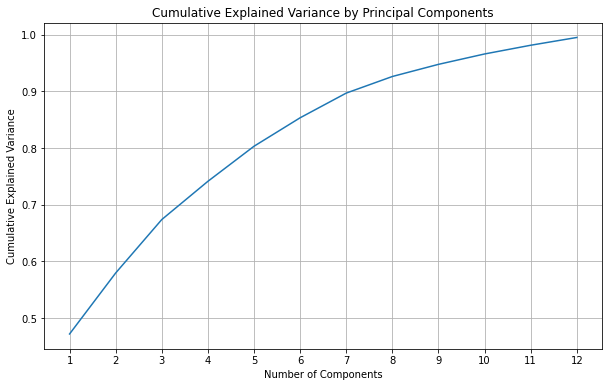

In [6]:
# reference: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb#scrollTo=dvIYaM6_FuPt

from sklearn.decomposition import PCA

# standardize features for training set
Xt_standard = (Xt - Xt.mean()) / Xt.std()

# perform PCA on training set
pca = PCA()
Xt_pca = pca.fit_transform(Xt_standard)

# calculate the explained variance for each component
explained_variance_ratio = pca.explained_variance_ratio_

# plot variance for the first 12 components
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), np.cumsum(explained_variance_ratio[:12]))
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, 13))
plt.grid(True)

### 1.4 Visualizing the components

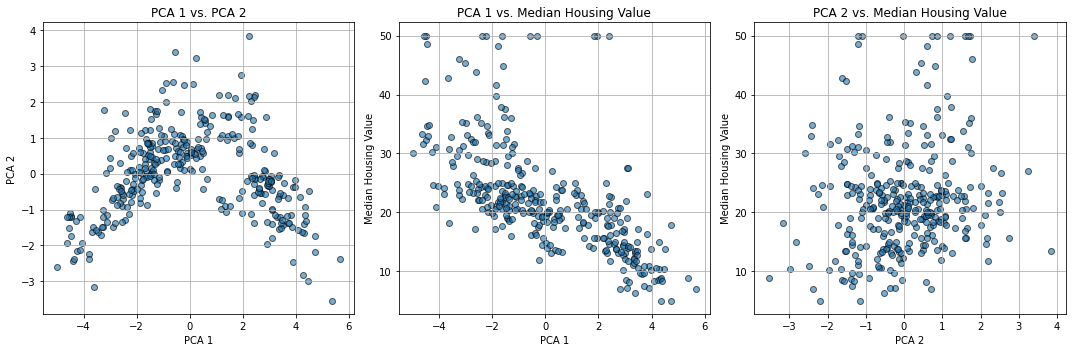

In [7]:
pca = PCA(n_components=2)
Xt_pca = pca.fit_transform(Xt_standard)

plt.figure(figsize=(15, 5))

# plot PCA 1 vs. PCA 2
plt.subplot(1, 3, 1)
plt.scatter(Xt_pca[:, 0], Xt_pca[:, 1], alpha=0.6, edgecolors='k')
plt.title('PCA 1 vs. PCA 2')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)

# plot PCA 1 vs. Median Housing Value
plt.subplot(1, 3, 2)
plt.scatter(Xt_pca[:, 0], yt, alpha=0.6, edgecolors='k')
plt.title('PCA 1 vs. Median Housing Value')
plt.xlabel('PCA 1')
plt.ylabel('Median Housing Value')
plt.grid(True)

# plot PCA 2 vs. Median Housing Value
plt.subplot(1, 3, 3)
plt.scatter(Xt_pca[:, 1], yt, alpha=0.6, edgecolors='k')
plt.title('PCA 2 vs. Median Housing Value')
plt.xlabel('PCA 2')
plt.ylabel('Median Housing Value')
plt.grid(True)

plt.tight_layout()

### 1.5 Regression and PCA

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pca = PCA(n_components=1)
Xt_pca = pca.fit_transform(Xt_standard)

# fit a linear regression model on the first principal component
lr_pca = LinearRegression()
lr_pca.fit(Xt_pca, yt)

# project all data onto the 1-dimensional subspace
Xv_standard = (Xv - Xt.mean()) / Xt.std()  
Xv_pca = pca.transform(Xv_standard)

yt_pred_pca = lr_pca.predict(Xt_pca)
yv_pred_pca = lr_pca.predict(Xv_pca)

rmse_t_pca = np.sqrt(mean_squared_error(yt, yt_pred_pca))
rmse_v_pca = np.sqrt(mean_squared_error(yv, yv_pred_pca))

print("RMSE on training set with PCA:", rmse_t_pca)
print("RMSE on test set with PCA:", rmse_v_pca)

RMSE on training set with PCA: 6.911291760419621
RMSE on test set with PCA: 7.954392540411572


The linear regression model using PCA as a predictor yields lower RMSE values on both the training and test sets compared to the model without using PCA.The reduced RMSE suggests that the linear regression model with PCA is capturing a significant portion of the variance in the median housing prices using a reduced-dimensional representation of the data, indicating that the linear regression model with PCA is a more effective predictor of median housing prices.

## 2 Cluster images

### 2.1 Decompress and explore 

a) I saw a bunch of statistical graphs including pie charts, line charts, dot plots, and bar charts.

In [16]:
# b
import os

folder_path = 'visualizations'
file_names = os.listdir(folder_path)
len(file_names)

929

### 2.2 Load and cluster

In [18]:
# a
from matplotlib.image import imread

sample_size = 100
sample_files = np.random.choice(files, sample_size, replace=False)

# read the first image to get the shape
im1 = imread(os.path.join(folder_path, sample_files[0])) 
imshape = im1.shape

# initialize an empty array to store image data
X = np.empty(shape=(len(sample_files), imshape[0] * imshape[1] * imshape[2]))

# load images into the array
for i, img in enumerate(sample_files): 
    pixels = imread(os.path.join(folder_path, img))
    X[i,:] = pixels.ravel()

In [ ]:
# b
from sklearn.cluster import KMeans

k = 5 
kmeans = KMeans(n_clusters=k, random_state=371)

# fit the model to image data
kmeans.fit(X)

# get the labels assigned to each image
labels = kmeans.labels_

### 2.3 Analyze the clusters

2.3.1

In [20]:
clusters_array = labels

2.3.2

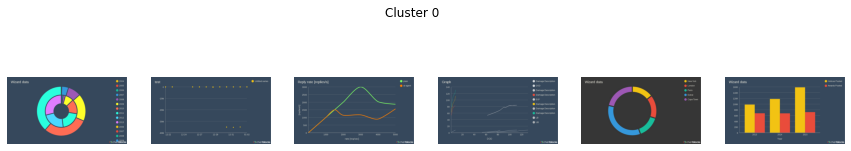

In [25]:
# plot 6 random images from given cluster ’c’
# inputs: cl: list of clusters for images (Nx1 vector) c: images from which cluster to plot (0..k-1)
def plotcluster(cl, c, imshape, X):
    plt.figure(figsize=(15, 3))
    plt.suptitle('Cluster ' + str(c))

    Xcl = X[cl == c]
    inds = np.random.choice(len(Xcl), 6, replace=False)

    for i, ind in enumerate(inds):
        ax = plt.subplot(1, 6, i + 1)
        img_array = Xcl[ind, :].reshape(imshape)

        ax.imshow(img_array)
        ax.axis('off')

    plt.show()

# try different cluster
cluster_number = 0  
plotcluster(labels, cluster_number, imshape, X)

2.3.3

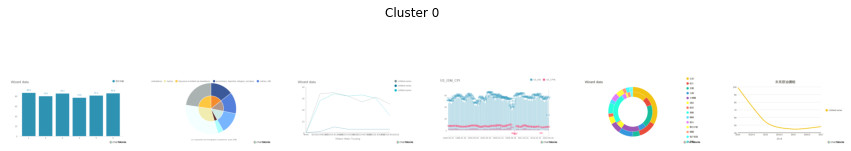

In [59]:
sample_size = 20
sample_files = np.random.choice(files, sample_size, replace=False)

# read the first image to get the shape
im1 = imread(os.path.join(folder_path, sample_files[0])) 
imshape = im1.shape

# initialize an empty array to store image data
X = np.empty(shape=(len(sample_files), imshape[0] * imshape[1] * imshape[2]))

# load images into the array
for i, img in enumerate(sample_files): 
    pixels = imread(os.path.join(folder_path, img))
    X[i,:] = pixels.ravel()

k = 2
kmeans = KMeans(n_clusters=k, random_state=371)

# fit the model to image data
kmeans.fit(X)

# get the labels assigned to each image
labels = kmeans.labels_

clusters_array = labels

def plotcluster(cl, c, imshape, X):
    plt.figure(figsize=(15, 3))
    plt.suptitle('Cluster ' + str(c))

    Xcl = X[cl == c]
    inds = np.random.choice(len(Xcl), 6, replace=False)

    for i, ind in enumerate(inds):
        ax = plt.subplot(1, 6, i + 1)
        img_array = Xcl[ind, :].reshape(imshape)

        ax.imshow(img_array)
        ax.axis('off')

    plt.show()

# try different cluster
cluster_number = 0 
plotcluster(labels, cluster_number, imshape, X)

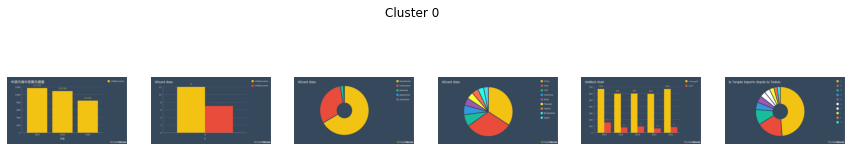

In [58]:
sample_size = 300
sample_files = np.random.choice(files, sample_size, replace=False)

# read the first image to get the shape
im1 = imread(os.path.join(folder_path, sample_files[0])) 
imshape = im1.shape

# initialize an empty array to store image data
X = np.empty(shape=(len(sample_files), imshape[0] * imshape[1] * imshape[2]))

# load images into the array
for i, img in enumerate(sample_files): 
    pixels = imread(os.path.join(folder_path, img))
    X[i,:] = pixels.ravel()

k = 7
kmeans = KMeans(n_clusters=k, random_state=371)

# fit the model to image data
kmeans.fit(X)

# get the labels assigned to each image
labels = kmeans.labels_

clusters_array = labels

def plotcluster(cl, c, imshape, X):
    plt.figure(figsize=(15, 3))
    plt.suptitle('Cluster ' + str(c))

    Xcl = X[cl == c]
    inds = np.random.choice(len(Xcl), 6, replace=False)

    for i, ind in enumerate(inds):
        ax = plt.subplot(1, 6, i + 1)
        img_array = Xcl[ind, :].reshape(imshape)

        ax.imshow(img_array)
        ax.axis('off')

    plt.show()

# try different cluster
cluster_number = 0
plotcluster(labels, cluster_number, imshape, X)

2.3.3

I found that smaller sample size with smaller k seems likely to generate inaccurate clustering result, while the performance of larger sample size with larger k is more accurate. When sample_size = 100, k=5, the model successfully clusters graphs with dark background and multi-color charts together, though there are different tyes of charts (line, dot, pie, bar). When decreasing sample_size to 20 and k to 2, the model seems perform worse. It clustered all light background images together, but it contains different types of charts, with some are single-color, some are multi-color. When increasing sample_size to 300 and k to 7, the color of images in a cluster looks more harmony, all with dark background and color blocks with yellow as the dominant color. 

## 3 Images: Reduce the number of colors

### 3.1

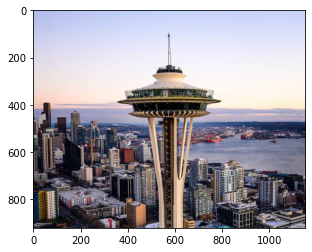

In [63]:
pixels = imread("spaceNeddle.jpeg")
ax = plt.axes()
ax.set_aspect("equal")
plt.imshow(pixels)
plt.show()

In [64]:
pixels.shape

(922, 1154, 3)

In [65]:
# reshape the image matrix
M = pixels.reshape((-1, pixels.shape[2]))
print(M.shape)

# perform k-means clustering
m = KMeans(16).fit(M)
cl = m.predict(M)
centers = m.cluster_centers_
print("Center color values:\n", centers)

(1063988, 3)
Center color values:
 [[ 68.25075446  54.55184844  51.64716238]
 [199.91067925 209.51855717 245.6135244 ]
 [156.40946311 154.07030276 173.91537163]
 [247.48162488 242.03760527 241.92304176]
 [ 77.65841064  77.24246169  92.39914796]
 [118.69368664  86.23207373  65.39442396]
 [174.26892223 137.54596074 110.13198377]
 [ 10.78650834   9.63211988  16.35259159]
 [106.80444838 104.41694284 118.27496677]
 [242.42288425 217.15052977 202.5013078 ]
 [223.98059159 226.3032445  247.61562329]
 [187.95446001 179.77266826 195.96228901]
 [ 33.43170206  28.92701731  35.17330284]
 [206.18885124 176.33802101 154.46804473]
 [127.27082817 128.06841991 148.74249938]
 [ 36.14132543  46.84231636  72.0520107 ]]


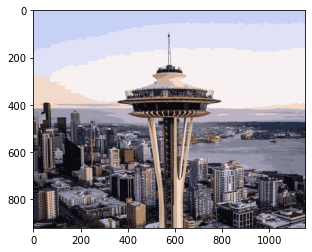

In [66]:
# normalize and reshape the compressed image
compressed = centers[cl] / 255
compressed = compressed.reshape(pixels.shape)

# display the compressed image
ax = plt.axes()
ax.set_aspect("equal")
plt.imshow(compressed)
plt.show()

### 3.2

a) 

The shape of pixels represents the dimensions of the image. For example, my pixels.shape is (922, 1154, 3), it means the image has a height of 922 pixels, width of 1154 pixels, and three color channels (RGB).

b) 

M is a reshaped version of the image matrix pixels where each row represents a pixel, and each column represents a color channel. In my example, it has 1063988 rows (922 * 1154) and 3 columns (RGB channels).

c)

The cl array contains cluster labels assigned to each pixel by the k-means clustering algorithm. If cl[12345] = 2, it means the pixel at index 12345 belongs to cluster 2.

d)

Each row in the "center color values" represents the RGB values of a cluster center obtained by k-means clustering. For example, the first row, second column (163.37) represents the green channel's intensity for that color.

e) 

The number of center color values is determined by the parameter passed to KMeans. In this case, it is set to 16, so there are 16 center color values representing the 16 clusters formed by the algorithm.

### 3.3

In [67]:
def compress_image(image_path, num_colors):
    pixels = imread(image_path)
    M = pixels.reshape((-1, pixels.shape[2]))
    m = KMeans(num_colors).fit(M)
    cl = m.predict(M)
    centers = m.cluster_centers_
    compressed = centers[cl] / 255
    compressed = compressed.reshape(pixels.shape)
    
    ax = plt.axes()
    ax.set_aspect("equal")
    plt.imshow(compressed)
    plt.show()

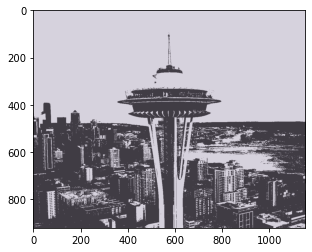

In [69]:
compress_image("spaceNeddle.jpeg", 2)

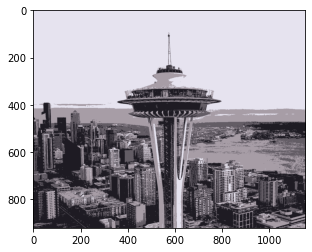

In [70]:
compress_image("spaceNeddle.jpeg", 4)

I spent 8 hour on this ps